In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_excel("/Users/shreyanshsourabh/Downloads/archive-3/Data_Train.xlsx")

# Data Preprocessing

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.shape

(10683, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train = train.dropna()

In [7]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])

In [8]:
train['Duration']=train['Duration'].str.replace("h","*60").str.replace("m","*1").str.replace(' ','+').apply(eval)

In [9]:
train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [10]:
train["Total_Stops"].replace({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
},inplace =True)

# EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

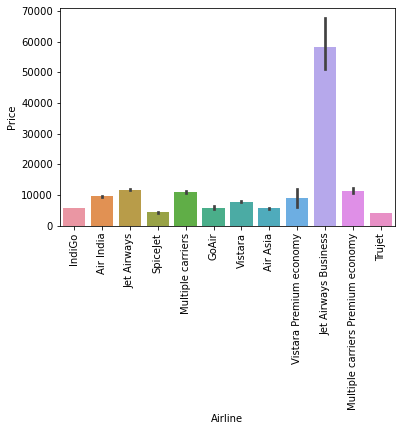

In [12]:
sns.barplot(x=train['Airline'], y = train['Price'])
plt.xticks(rotation = 90)
plt.show()

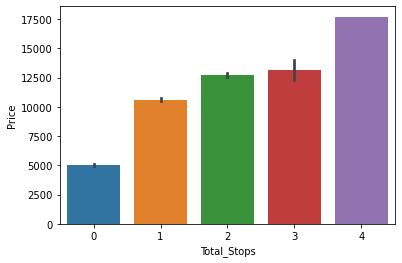

In [13]:
sns.barplot(x=train['Total_Stops'], y = train['Price'])
plt.show()

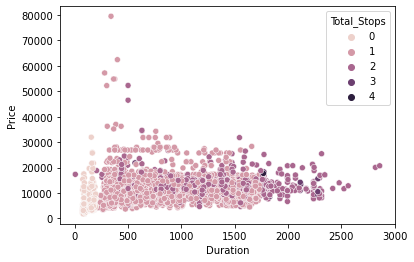

In [14]:
sns.scatterplot(x=train['Duration'], y = train['Price'], hue=train['Total_Stops'])
plt.show()

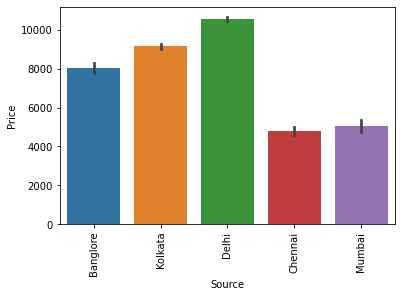

In [15]:
sns.barplot(x=train['Source'], y = train['Price'])
plt.xticks(rotation = 90)
plt.show()

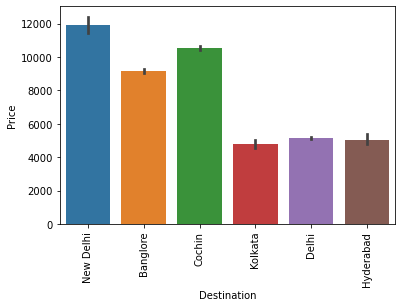

In [16]:
sns.barplot(x=train['Destination'], y = train['Price'])
plt.xticks(rotation = 90)
plt.show()

# Feature Engineering on date and times

In [17]:
train['Arrival_Time'] = train['Arrival_Time'].str.split(' ').str[0]
train['Arr_hr'] = train['Arrival_Time'].str.split(':').str[0].astype(int)
train['Arr_min'] = train['Arrival_Time'].str.split(':').str[1].astype(int)

In [18]:
train['Dep_Time'] = train['Dep_Time'].str.split(' ').str[0]
train['Dep_hr'] = train['Dep_Time'].str.split(':').str[0].astype(int)
train['Dep_min'] = train['Dep_Time'].str.split(':').str[1].astype(int)

In [19]:
train['journey_month'] = train['Date_of_Journey'].dt.month
train['journey_date'] = train['Date_of_Journey'].dt.day

In [20]:
for col in train.columns:
    if train[col].dtype=='object' :
        print(col, len(train[col].unique()))

Airline 12
Source 5
Destination 6
Route 128
Dep_Time 222
Arrival_Time 223
Additional_Info 10


In [21]:
train['r1'] = train['Route'].str.split(' → ').str[0]
train['r2'] = train['Route'].str.split(' → ').str[1]
train['r3'] = train['Route'].str.split(' → ').str[2]
train['r4'] = train['Route'].str.split(' → ').str[3]
train['r5'] = train['Route'].str.split(' → ').str[4]

In [22]:
train.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Arr_hr                 0
Arr_min                0
Dep_hr                 0
Dep_min                0
journey_month          0
journey_date           0
r1                     0
r2                     0
r3                  3491
r4                  9116
r5                 10636
dtype: int64

In [23]:
train.fillna('UNK',inplace = True)

In [24]:
airstops = []

In [25]:
for i in train['r1'].unique():
    airstops.append(i)
    
for i in train['r2'].unique():
    airstops.append(i)
    
for i in train['r3'].unique():
    airstops.append(i)
    
for i in train['r4'].unique():
    airstops.append(i)
    
for i in train['r5'].unique():
    airstops.append(i)
    
airstops = list(set(airstops))
len(airstops)

43

In [26]:
for i in airstops:
    print(i, end=' ')

LKO COK HYD GWL NAG RPR IMF STV UDR BDQ DEL VTZ BBI IXU AMD MAA PAT KNU GAU HBX NDC PNQ DED IXC BLR BOM JLR VNS GOI UNK VGA BHO IXZ IXR JAI JDH ATQ IDR TRV CCU ISK IXB IXA 

# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

encr = LabelEncoder()

In [28]:
ler  = encr.fit(airstops)

In [29]:
train['r1'] = encr.transform(train['r1'])
train['r2'] = encr.transform(train['r2'])
train['r3'] = encr.transform(train['r3'])
train['r4'] = encr.transform(train['r4'])
train['r5'] = encr.transform(train['r5'])

In [30]:
enca = LabelEncoder()
lea = enca.fit(train['Airline'])
train['Airline'] = enca.transform(train['Airline'])

# One Hot Encoding

In [31]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arr_min,Dep_hr,Dep_min,journey_month,journey_date,r1,r2,r3,r4,r5
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,No info,...,10,22,20,3,24,5,10,39,39,39
1,1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,...,15,5,50,1,5,7,22,2,5,39
2,4,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,No info,...,25,9,25,9,6,10,29,6,8,39
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,...,30,18,5,12,5,7,31,5,39,39
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,...,35,16,50,1,3,5,31,10,39,39


In [32]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Arr_hr             0
Arr_min            0
Dep_hr             0
Dep_min            0
journey_month      0
journey_date       0
r1                 0
r2                 0
r3                 0
r4                 0
r5                 0
dtype: int64

In [33]:
train.drop(columns=['Date_of_Journey',
                    'Source', 'Destination',
                    'Route','Additional_Info','Dep_Time',
                    'Arrival_Time',
                   ],axis=1,inplace = True)

# Outliers

In [34]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


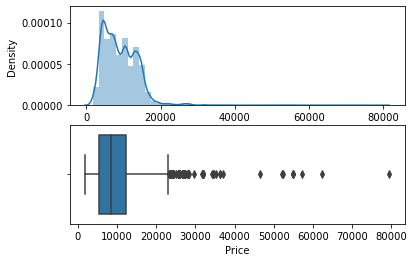

In [35]:
plot(train,'Price')

In [36]:
train['Price']=np.where(train['Price']>=35000,train['Price'].median(),train['Price'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


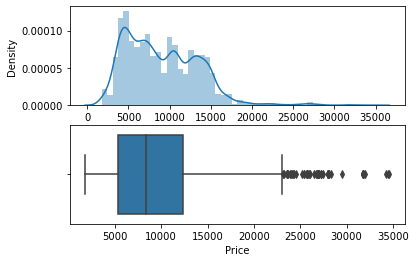

In [37]:
plot(train,'Price')

# Splitting

In [38]:
X = train.drop('Price',axis = 1)
Y = train['Price']

In [39]:
X.shape

(10682, 14)

In [40]:
X.columns

Index(['Airline', 'Duration', 'Total_Stops', 'Arr_hr', 'Arr_min', 'Dep_hr',
       'Dep_min', 'journey_month', 'journey_date', 'r1', 'r2', 'r3', 'r4',
       'r5'],
      dtype='object')

# Data Standardisation

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
std = scaler.fit(X)
X = scaler.transform(X)

# Model Training

In [43]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X,Y, test_size = 0.33, random_state = 128)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7156, 14) (3526, 14) (7156,) (3526,)


In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Training score: 0.49737826118602846
Testing score: 0.5010658969034336
Predictions are: [12030.83550476 11064.30247156 11749.31698811 ... 11797.96560093
 11551.44027214 10841.50322388]


r2 score is: 0.5010658969034336
MAE:2311.0825663293795
MSE:10135747.072531689
RMSE:3183.6688069790944




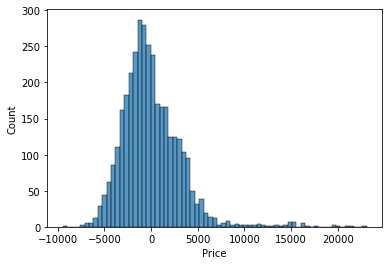

In [45]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train,Y_train)
print("Training score: {}".format(model.score(X_train,Y_train)))
print("Testing score: {}".format(model.score(X_test,Y_test)))
predictions = model.predict(X_test)
print("Predictions are: {}".format(predictions))
print('\n')
r2score=r2_score(Y_test,predictions)
print("r2 score is: {}".format(r2score))

print('MAE:{}'.format(mean_absolute_error(Y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(Y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))
print('\n')

sns.histplot(Y_test-predictions)
model1 = model

Training score: 0.7952492655961532
Testing score: 0.6770919096902108
Predictions are: [11958.6 12422.  12526.8 ... 11861.4 11512.6  7389.4]


r2 score is: 0.6770919096902108
MAE:1689.6231990924562
MSE:6559813.632183778
RMSE:2561.213312511041




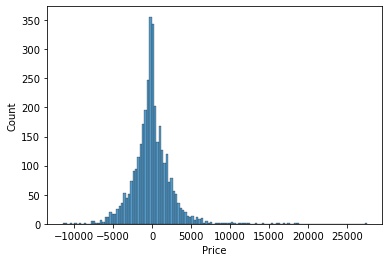

In [46]:
from sklearn.neighbors import KNeighborsRegressor

model= KNeighborsRegressor()
model.fit(X_train,Y_train)
print("Training score: {}".format(model.score(X_train,Y_train)))
print("Testing score: {}".format(model.score(X_test,Y_test)))
predictions = model.predict(X_test)
print("Predictions are: {}".format(predictions))
print('\n')
r2score=r2_score(Y_test,predictions)
print("r2 score is: {}".format(r2score))

print('MAE:{}'.format(mean_absolute_error(Y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(Y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))
print('\n')

sns.histplot(Y_test-predictions)
model2 = model

Training score: 0.9550625239603366
Testing score: 0.8091124007677566
Predictions are: [13777.68   10975.86   13941.23   ... 12653.59   13829.8375 12330.26  ]


r2 score is: 0.8091124007677566
MAE:1180.215442039101
MSE:3877843.6132002454
RMSE:1969.2241145182652




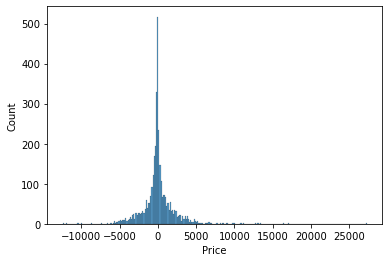

In [47]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,Y_train)
print("Training score: {}".format(model.score(X_train,Y_train)))
print("Testing score: {}".format(model.score(X_test,Y_test)))
predictions = model.predict(X_test)
print("Predictions are: {}".format(predictions))
print('\n')
r2score=r2_score(Y_test,predictions)
print("r2 score is: {}".format(r2score))

print('MAE:{}'.format(mean_absolute_error(Y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(Y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))
print('\n')

sns.histplot(Y_test-predictions)
model3 = model

# Deployement

In [48]:
import pickle
pickle.dump(model3,open('flight_fare_model.pkl','wb'))
pickle.dump(ler,open('flight_fare_label_encoder.pkl','wb'))
pickle.dump(lea,open('flight_fare_label_encoder_air.pkl','wb'))
pickle.dump(std,open('flight_fare_std.pkl','wb'))